In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# [하] 데이터에 결측치가 있다면, 4가지 이상 방법을 사용한 후 검증하시오.
데이터내에 결측치가 있다면, 4가지 이상의 방법을 적용하여서 검증해보세요.

In [210]:
# 결측치 확인하기
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

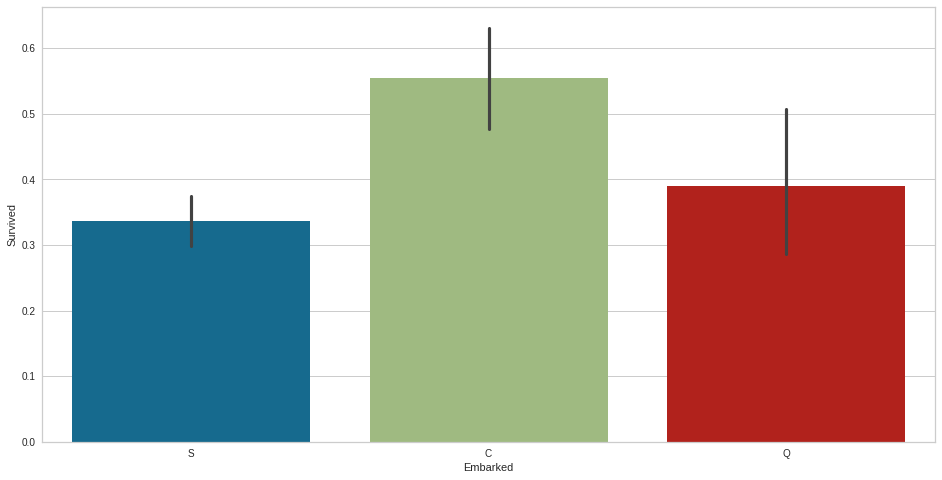

In [211]:
# Embarked 결측치 채워주기
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'Embarked', y = 'Survived')

# 최빈값으로 결측치 채워주기
data['Embarked'] = data['Embarked'].fillna('C')

In [212]:
# Age의 결측치 채워주기
data['Age'] = data['Age'].fillna(-1)

# Embarked를 기준으로 Age결측치 채우기
for i in data.index:
  if data.loc[i,'Age'] == -1:
    if data.loc[i,'Embarked'] == 'S':
      data.loc[i, 'Age'] = data[data['Embarked'] == 'S']['Age'].mean()
    elif data.loc[i,'Embarked'] == 'P':
      data.loc[i,'Age'] = data[data['Embarked'] == 'P']['Age'].mean()
    else:
      data.loc[i,'Age'] = data[data['Embarked'] == 'Q']['Age'].mean()

# Pclass를 기준으로 Age결측치 채우기
for i in data.index:
  if data.loc[i, 'Age'] == -1:
    if data.loc[i, 'Pclass'] == 1:
      data.loc[i,'Age'] = data[data['Pcalss'] == 1]['Age'].mean()
    elif data.loc[i,'Pclass'] == 2:
      data.loc[i, 'Age'] = data[data['Pclass'] == 2]['Age'].mean()
    else:
      data.loc[i, 'Age'] = data[data['Pcalss'] == 3]['Age'].mean()

In [213]:
# Cabin의 결측치는 너무 많기 때문에 column을 없애준다.
data = data.drop('Cabin', axis = 1)

In [214]:
# 결측치가 채워졌는지 확인
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# [중] 이름에 대한 속성을 분석하시오.
이름에 대한 속성을 분석하고, 검증하시오.

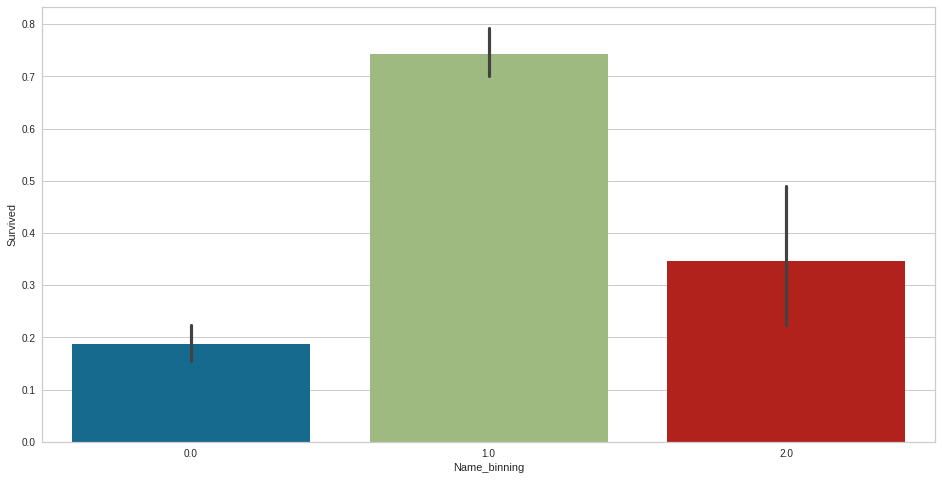

In [215]:
# Name
data['Name'] = data['Name'].apply(lambda x: x.split()[1])
data['Name'] = data['Name'].apply(lambda x:x.replace('.',''))
data.head()


# binning을 해주기
data.loc[(data['Name'] == 'Mr') | (data['Name'] == 'Master'), 'Name_binning'] = 0
data.loc[(data['Name'] == 'Miss') | (data['Name'] == 'Mrs') | (data['Name'] == 'Miss'), 'Name_binning'] = 1
data['Name_binning'] = data['Name_binning'].fillna(2)

# binning해준 결과를 데이터로 살펴보기
# 데이터별로 확연한 차이가 있음을 보여준다.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'Name_binning', y = 'Survived')

# [상] 나이대별로 binning 작업을 하시오.
나이대별로 binning 작업을 하여서 검증 하시오.

Text(0.5, 1.0, 'Age distribution')

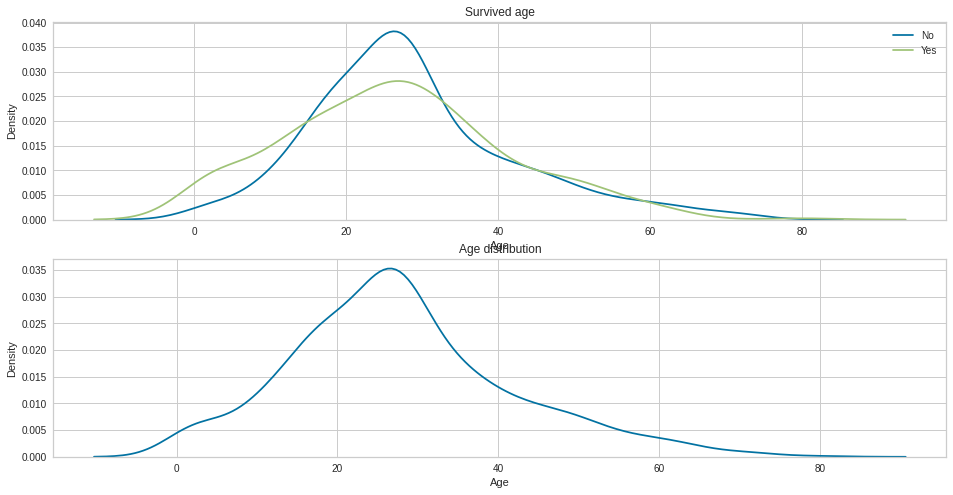

In [216]:
# 그래프 분포로 binning을 할려고 한다.
fig,ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(data[data['Survived'] == 0]['Age'], ax = ax[0], hist = False, label = 'No')
sns.distplot(data[data['Survived'] == 1]['Age'], ax = ax[0], hist = False, label = 'Yes')
sns.distplot(data['Age'], ax=ax[1], hist = False)
ax[0].set_title('Survived age')
ax[0].legend()
ax[1].set_title('Age distribution')

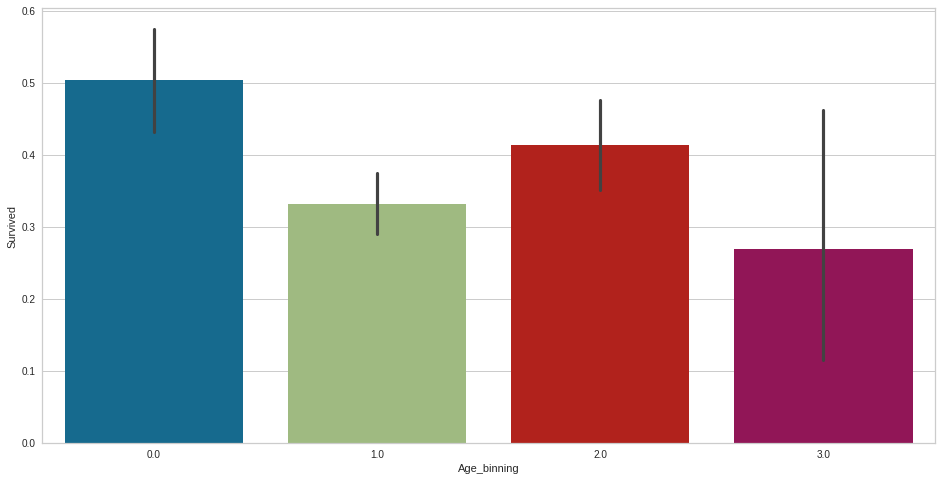

In [217]:
# 0과 1의 분포가 커지는 부분을 기준으로 잘라주자.
# 16,32,42,59로 나눠보자.
data.loc[data['Age'] <= 16,'Age_binning'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_binning'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 59), 'Age_binning'] = 2
data.loc[data['Age'] > 59,'Age_binning'] = 3

# barplot으로 target변수와 관련이 있는지 확인해 보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'Age_binning', y = 'Survived')

#  [상] 가설을 설정하고 데이터로 검증한 결과를 코드로 첨부하시오.
2가지 이상의 가설을 설정하고 데이터로 검증한 결과를 코드로 첨부하시오.

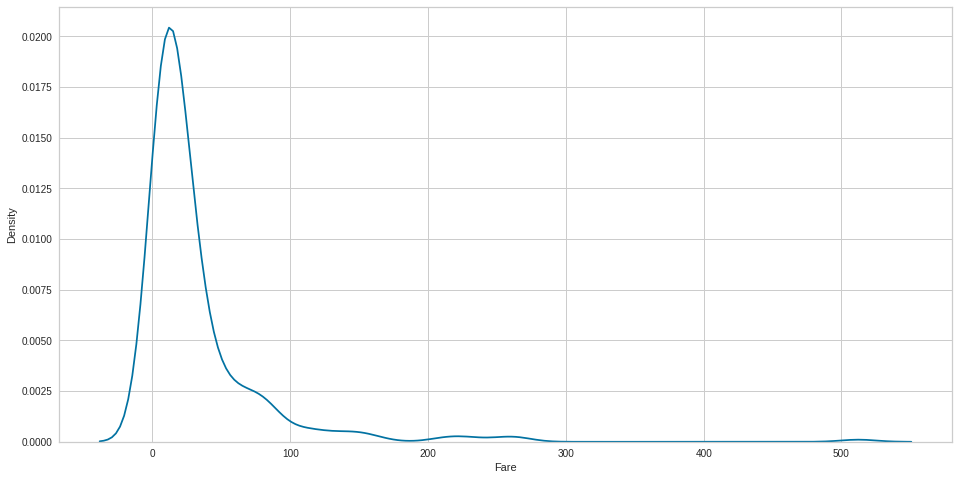

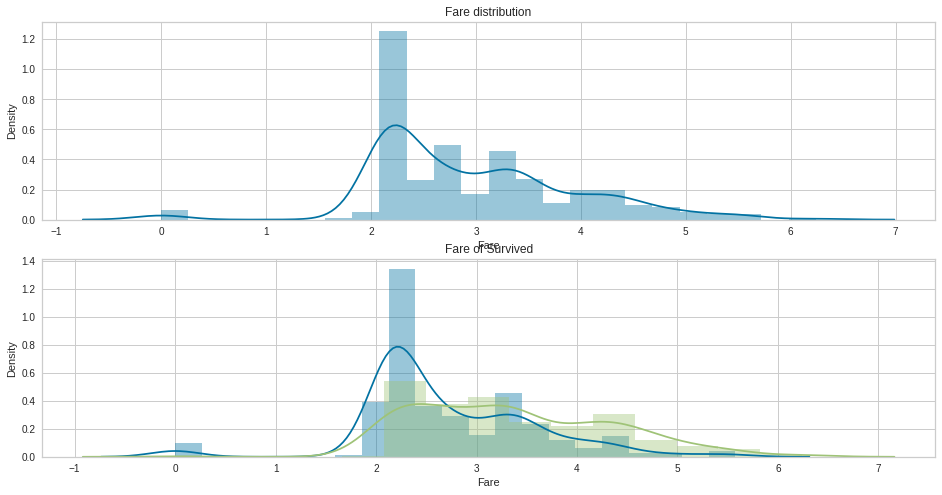

Text(0.5, 1.0, 'Fare_binning vs Survived')

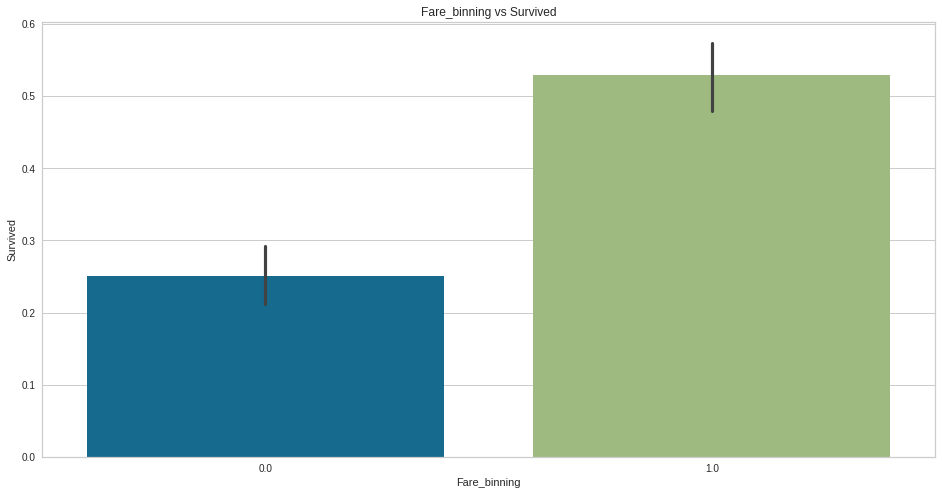

In [218]:
# 가정 1: 돈을 많이 낸 사람이 좋은 곳에 타고 있다고 생각한다. 그러면 돈을 많이 낸 사람이 많이 살아남지 않았을까?

# Fare
plt.figure(figsize =(16,8))
sns.kdeplot(data['Fare'])
plt.show()

# 정규화를 위해서 log 씌우기
data['Fare'] = data['Fare'].apply(lambda x: np.log1p(x))

# 그래프로 0과 1의 차이점을 Fare를 기준으로 확인해 보자.
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(data['Fare'], ax = ax[0])
ax[0].set_title('Fare distribution')

sns.distplot(data[data['Survived'] == 0]['Fare'], ax = ax[1], )
sns.distplot(data[data['Survived'] == 1]['Fare'], ax = ax[1])
ax[1].set_title('Fare of Survived')
plt.show()

# Fare binning을 높은것 낮은것으로 나눠서 해주도록 하자.
data.loc[data['Fare'] <= 2.8, 'Fare_binning'] = 0
data.loc[data['Fare'] > 2.8,'Fare_binning'] = 1

# Fare binning으로 데이터 별로 차이가 있는지 확인해 주자.
plt.figure(figsize =(16,8))
sns.barplot(data = data, x = 'Fare_binning', y = 'Survived')
plt.title('Fare_binning vs Survived')

# barplot으로 그려봤을 때 각 데이터마다 특성이 있는 것을 확인했다.
# 0과 1을 기준으로 비교했을 때 1의 데이터가 0보다 더 많은 돈을 낸 것을 확인했다.

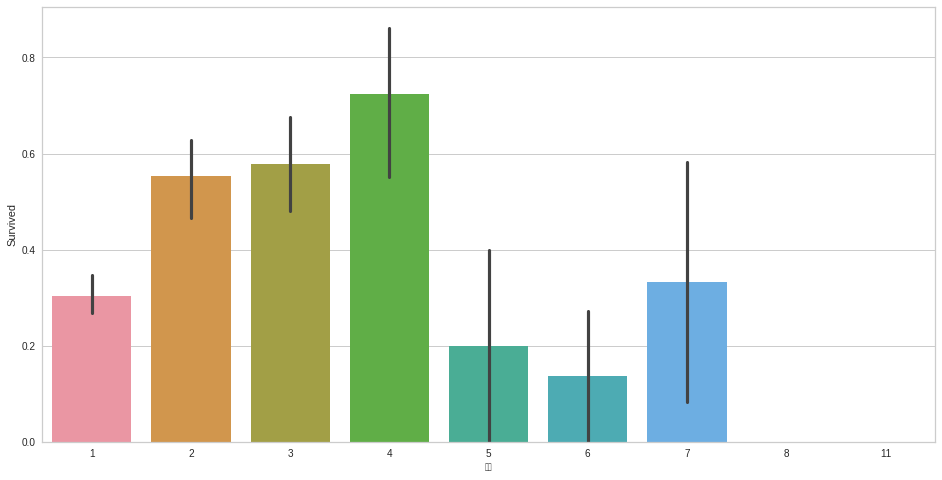

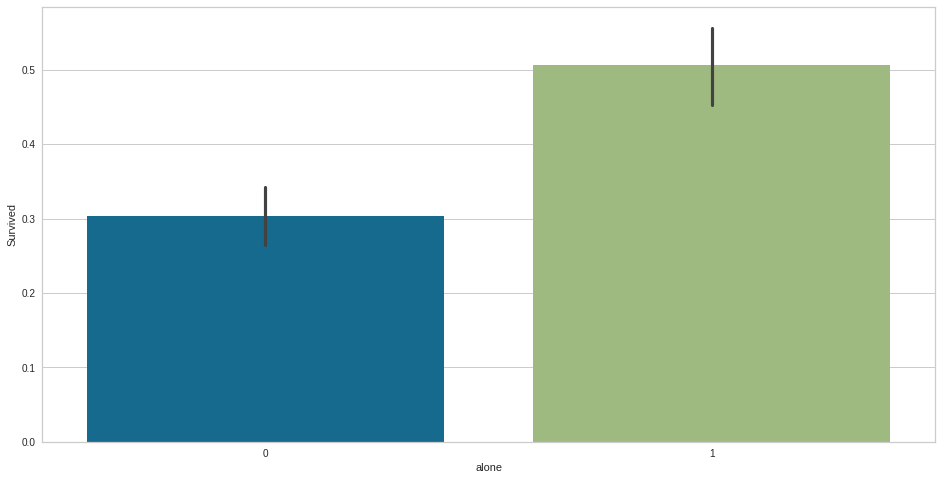

In [219]:
# 가정 2: 가족이란 변수를 만들어서 가족이 많을수록 더 많이 살아남지 않았을까?
# 가족이라는 변수 만들기
data['가족'] = data['SibSp'] + data['Parch'] + 1

plt.figure(figsize = (16,8))
sns.barplot(data =data, x = '가족', y = 'Survived')

# 같이 온 사람이 많다고 해서 많이 살아남은 것은 아니다.

# 그러면 혼자 온 사람과 혼자오지 않은 사람을 비교해보자.
data['alone'] = data['가족'].apply(lambda x:1 if x > 1 else 0)
plt.figure(figsize = (16,8))
sns.barplot(data =data, x = 'alone', y = 'Survived')

# 혼자 온 사람보다 가족끼리 온 사람이 살아남은 사람이 더 많다는 것을 확인할 수 있다.

# [중] 앙상블의 방법 중 stacking을 적용하시오.

In [220]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_binning,Age_binning,Fare_binning,가족,alone
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,2.110213,S,0.0,1.0,0.0,2,1
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,4.280593,C,1.0,2.0,1.0,2,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,2.188856,S,1.0,1.0,0.0,1,0
3,4,1,1,Mrs,female,35.0,1,0,113803,3.990834,S,1.0,2.0,1.0,2,1
4,5,0,3,Mr,male,35.0,0,0,373450,2.202765,S,0.0,2.0,0.0,1,0


In [221]:
# 모덿링을 위한 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
categorical = ['Pclass','Sex','Embarked']
drop = ['Name','Ticket','PassengerId','SibSp','Parch']


# 라벨 인코딩
le = LabelEncoder()
for i in categorical:
  data[i] = le.fit_transform(data[i])

# 필요없는 변수 없애주기
data = data.drop(drop, axis = 1)

# train과 test로 나눠주기
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis = 1), data['Survived'], test_size = 0.2, random_state = 42)

In [222]:
!pip install vecstack
!pip install catboost

In [223]:
# modeling 해주기
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from vecstack import stacking

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis = 1), data['Survived'], test_size = 0.2, random_state =42)

xgb = XGBClassifier(random_state = 42)
lgb = LGBMClassifier(random_state = 42)
rfg = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)

# Stacking Ensemble
models = [xgb,lgb,rfg,ada,cat]
S_train, S_test = stacking(models, X_train, y_train, X_test,regression = False, metric= ['acc'], n_folds = 3)
lr = LogisticRegression()
lr.fit(S_train, y_train)
stacking_pred = lr.predict(S_test)

np.mean(stacking_pred == y_test)

Learning rate set to 0.00749
0:	learn: 0.6889548	total: 1.01ms	remaining: 1.01s
1:	learn: 0.6832021	total: 2ms	remaining: 997ms
2:	learn: 0.6779202	total: 2.94ms	remaining: 976ms
3:	learn: 0.6735969	total: 3.84ms	remaining: 956ms
4:	learn: 0.6687523	total: 4.75ms	remaining: 946ms
5:	learn: 0.6644611	total: 5.68ms	remaining: 942ms
6:	learn: 0.6599328	total: 6.63ms	remaining: 940ms
7:	learn: 0.6550245	total: 7.55ms	remaining: 937ms
8:	learn: 0.6499456	total: 8.46ms	remaining: 932ms
9:	learn: 0.6464445	total: 9.44ms	remaining: 935ms
10:	learn: 0.6415901	total: 10.4ms	remaining: 934ms
11:	learn: 0.6368022	total: 11.3ms	remaining: 933ms
12:	learn: 0.6318594	total: 12.3ms	remaining: 931ms
13:	learn: 0.6285392	total: 13.2ms	remaining: 930ms
14:	learn: 0.6255293	total: 14.1ms	remaining: 926ms
15:	learn: 0.6216137	total: 15.9ms	remaining: 976ms
16:	learn: 0.6179837	total: 17ms	remaining: 980ms
17:	learn: 0.6140561	total: 18.2ms	remaining: 991ms
18:	learn: 0.6109761	total: 20.2ms	remaining: 1.04

0.8268156424581006

# Bike Sharing Demand

In [224]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/bike-sharing-demand/train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# [하] datetime의 속성을 sclicing이 가능하게 바꾸시오.

In [225]:
import datetime as dt
def date_time(data = None):
  data['datetime'] = pd.to_datetime(data['datetime'])
  data['month'] = data['datetime'].dt.month
  data['year'] = data['datetime'].dt.year
  data['day'] = data['datetime'].dt.day
  data['hour'] = data['datetime'].dt.hour
  return data

data = date_time(data)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,1,4


# [하] barplot을 사용하여 일/월/년과 시간대 별로 count의 수를 그려보시오.

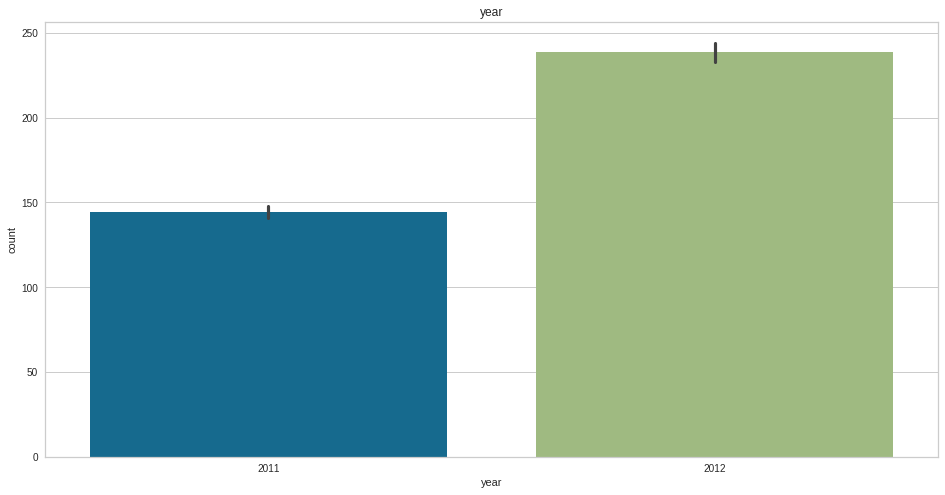

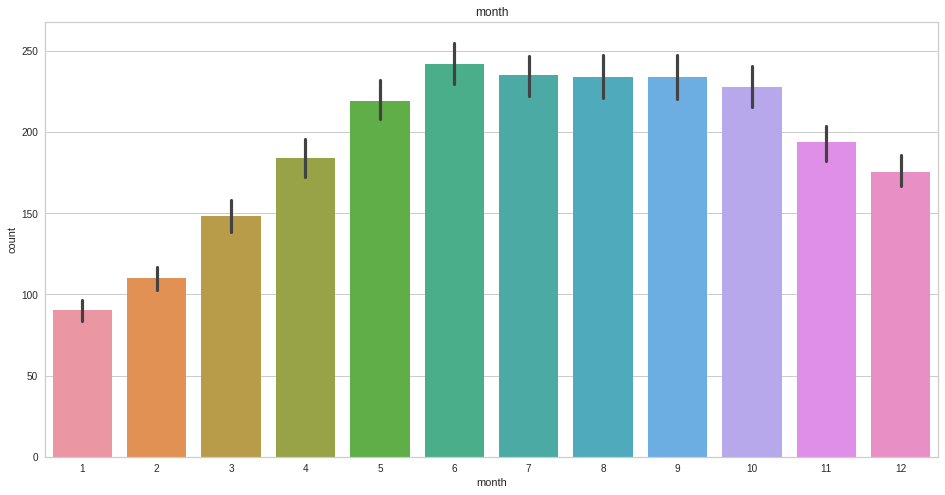

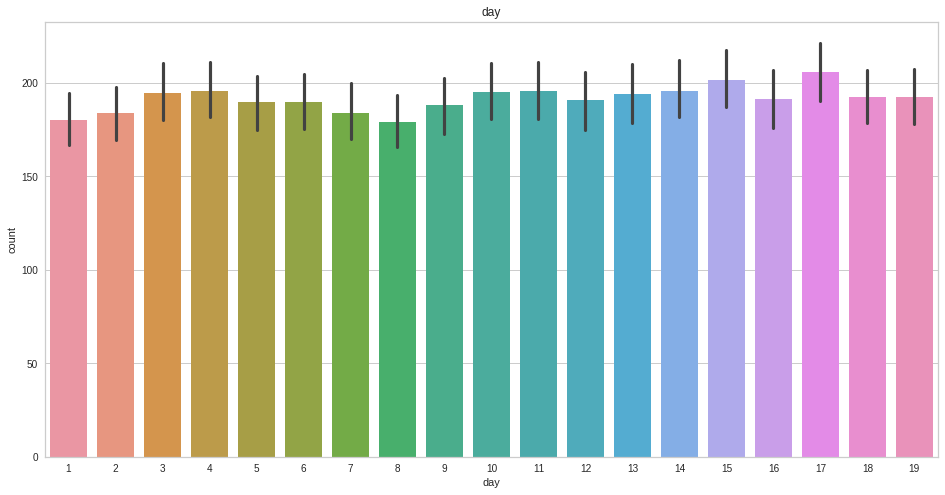

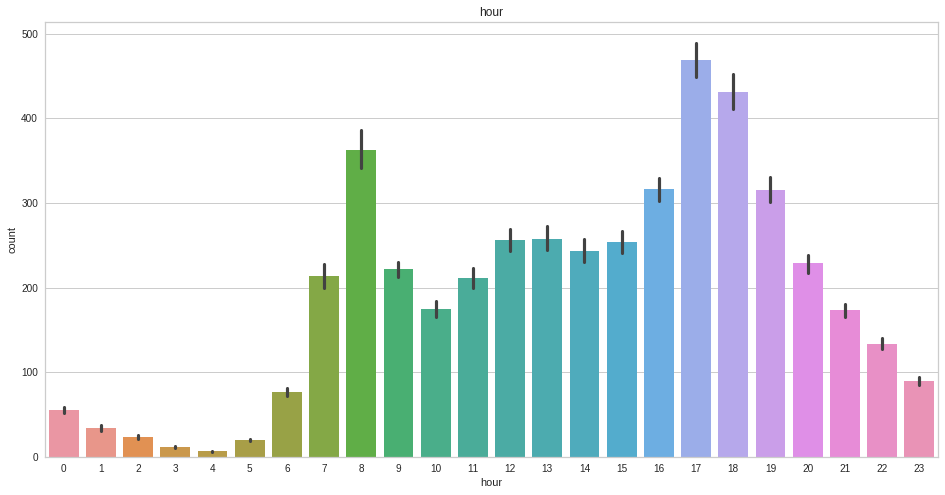

In [226]:
for i in ['year','month','day','hour']:
  plt.figure(figsize = (16,8))
  sns.barplot(data = data, x = i, y = 'count')
  plt.title(f'{i}')
  plt.show()

# [중]상관점수를 봐서 상관이 없어 보이는 것의 속성은 무엇인지 검증하시오.


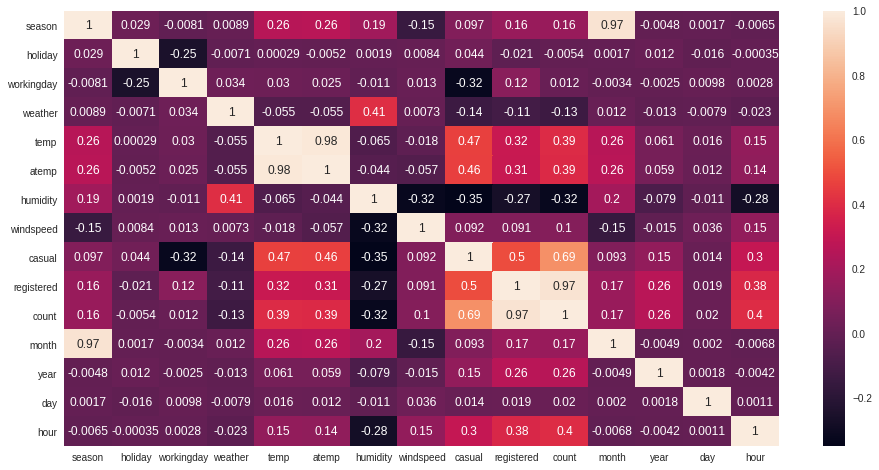

In [227]:
data_corr = data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(data_corr, annot = True)

Text(0.5, 1.0, 'workingday of lineplot')

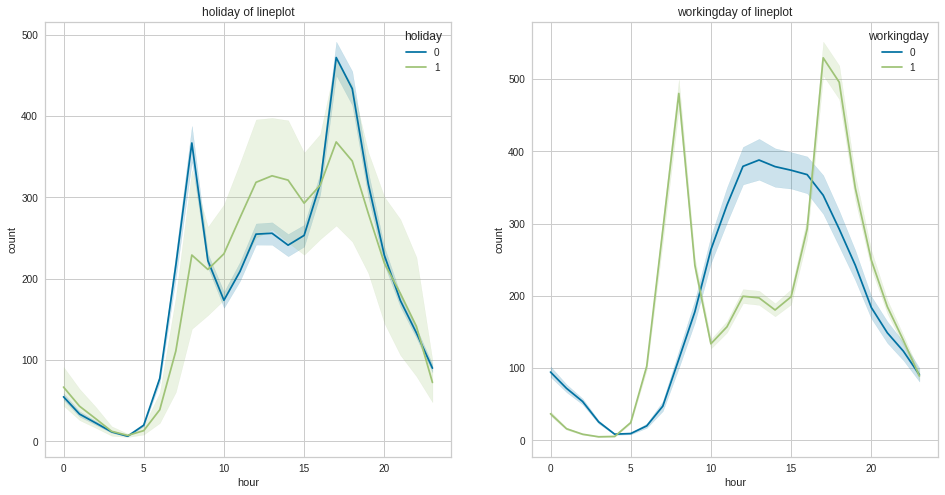

In [228]:
# holiday의 여부에 따라 시간별로 차이가 있다는 것을 확인했다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = 'hour', y = 'count', hue = 'holiday', ax = ax[0])
sns.lineplot(data = data, x = 'hour', y = 'count', hue = 'workingday', ax = ax[1])
ax[0].set_title('holiday of lineplot')
ax[1].set_title('workingday of lineplot')

# 시간순으로 비교해 봤을 때 계속 hour이 지날수록 target이 계속 오르거나 내리지 않고 어떤 구간에서 오르는 경향이 있기 때문에 직선을 따르지 않는다.
# 그러므로 데이터 입장에서는 시간이 지날수록 증가하거나 감소하지 않고 target이 높다고 holiday나 workingday가 1을 뜻하는 부분도 없다고 판단하여 상관관계가 낮게 평가되는 것 같다.
# 이런경우 모델을 돌릴 때 더미화를 통해서 구분해 주는 것이 좋을 것 같다.

Text(0.5, 1.0, 'working barplot')

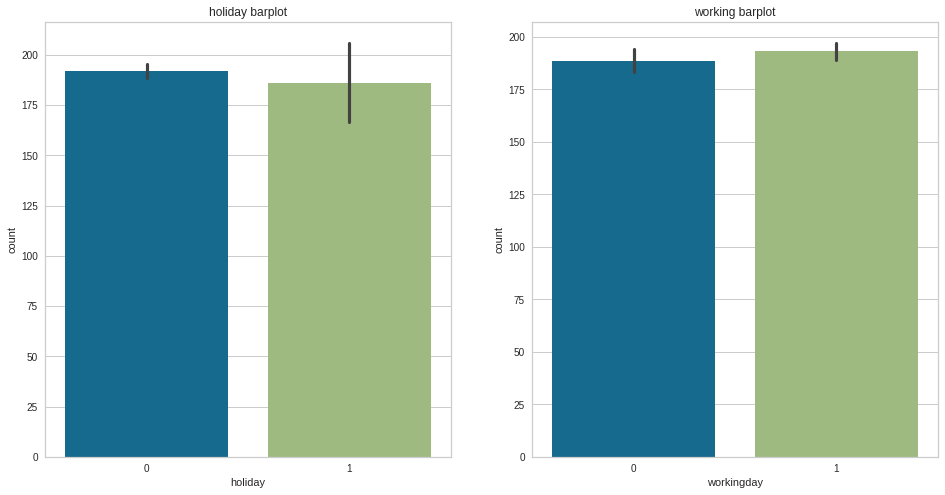

In [229]:
# 속성을 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize =(16,8))
sns.barplot(data = data, x = 'holiday', y = 'count', ax = ax[0])
sns.barplot(data = data, x = 'workingday', y = 'count', ax = ax[1])
ax[0].set_title('holiday barplot')
ax[1].set_title('working barplot')

# [상] 이상치 처리 방법을 2가지 이상 적용해보고 검증하시오.

Text(0.5, 1.0, 'atemp boxenplot')

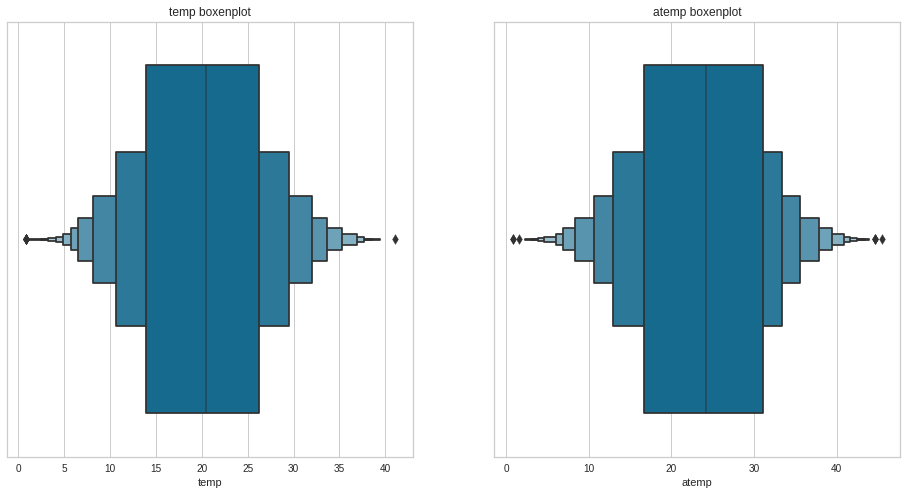

In [230]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(data['temp'], ax = ax[0])
sns.boxenplot(data['atemp'], ax = ax[1])
ax[0].set_title('temp boxenplot')
ax[1].set_title('atemp boxenplot')

In [231]:
# IQR방법을 통해서 이상치를 제거해 준다.
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=data, column='temp', weight=1.5)
data.drop(outlier_idx, axis=0, inplace=True)

In [232]:
# max값으로 나눠주기
data['atemp'] = data['atemp'].apply(lambda x: x/data['atemp'].max())

# [상] 모델을 적용하고 가설을 검증하시오.

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  year        10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [234]:
data = data.drop(['datetime','year'], axis = 1)

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(data.drop('count', axis = 1), data['count'], test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred)**0.5

# rmse가 엄청 낮아지는걸 확인할 수 있다.
print(RMSE)

8.488963216623827e-14


In [236]:
import statsmodels.api as sm

X = X_train
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.212e+33
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                        0.00
Time:                        06:42:04   Log-Likelihood:                      2.4881e+05
No. Observations:                8708   AIC:                                 -4.976e+05
Df Residuals:                    8695   BIC:                                 -4.975e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [237]:
# 과적합에 빠졌으므로 정확한 모델의 평가가 안된다.
# 나머지 변수들도 전처리를 통해 바꿔주기로 하자.
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,1,0,0,1,9.84,0.316687,81,0.0,3,13,16,1,1,0
1,1,0,0,1,9.02,0.299967,80,0.0,8,32,40,1,1,1
2,1,0,0,1,9.02,0.299967,80,0.0,5,27,32,1,1,2
3,1,0,0,1,9.84,0.316687,75,0.0,3,10,13,1,1,3
4,1,0,0,1,9.84,0.316687,75,0.0,0,1,1,1,1,4


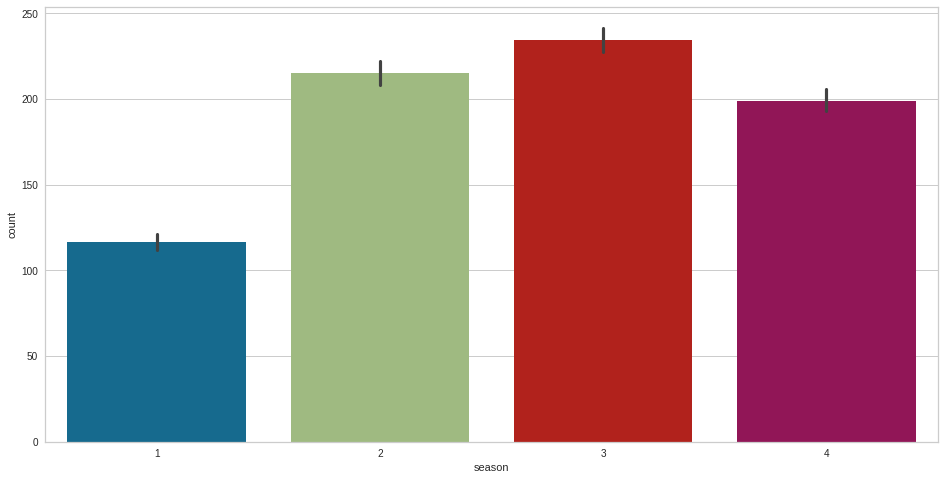

In [238]:
# season
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'season',y = 'count')

# 가을에 많이 뛰는 경향이 있다.
# 이 부분 같은 경우에 각 feature마다 서열이 생길 수 있기 때문에 더미화를 진행해 주자.

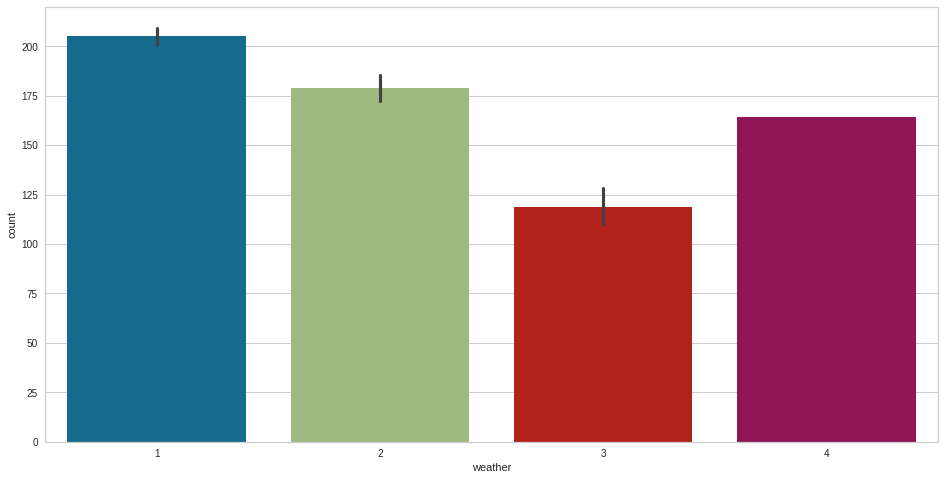

In [239]:
# weather
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'weather', y = 'count')

# 이 부분 또한 더미화를 진행해 주도록 하자.

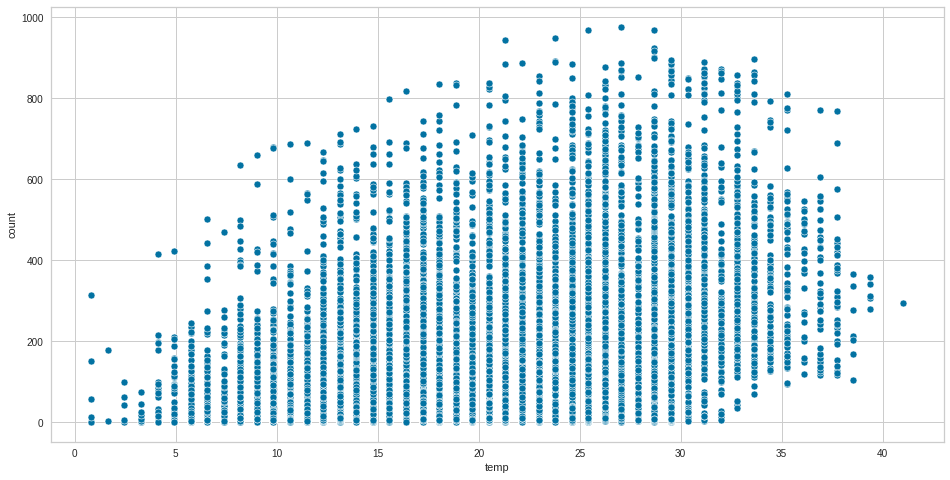

In [240]:
# temp 온도에 관한 변수
plt.figure(figsize = (16,8))
sns.scatterplot(data = data, x = 'temp', y = 'count')

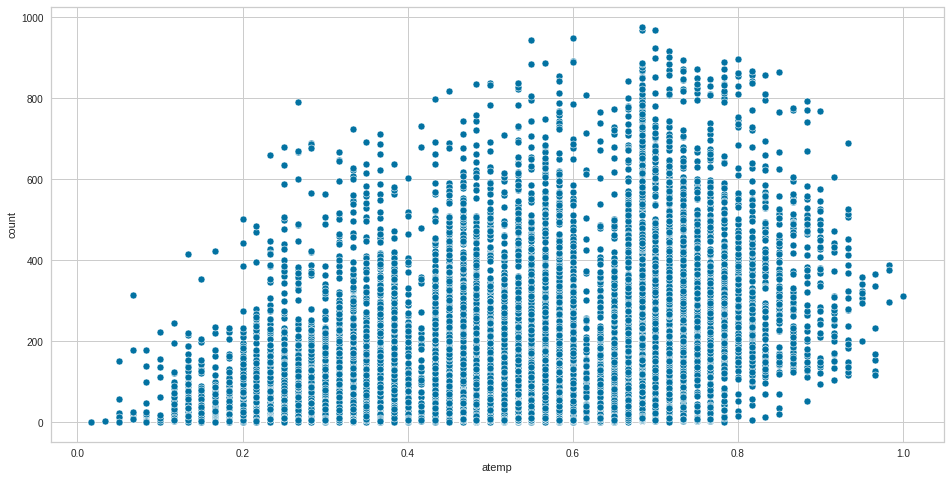

In [241]:
# atemp 불쾌지수에 관한 변수
plt.figure(figsize = (16,8))
sns.scatterplot(data = data, x = 'atemp', y = 'count')

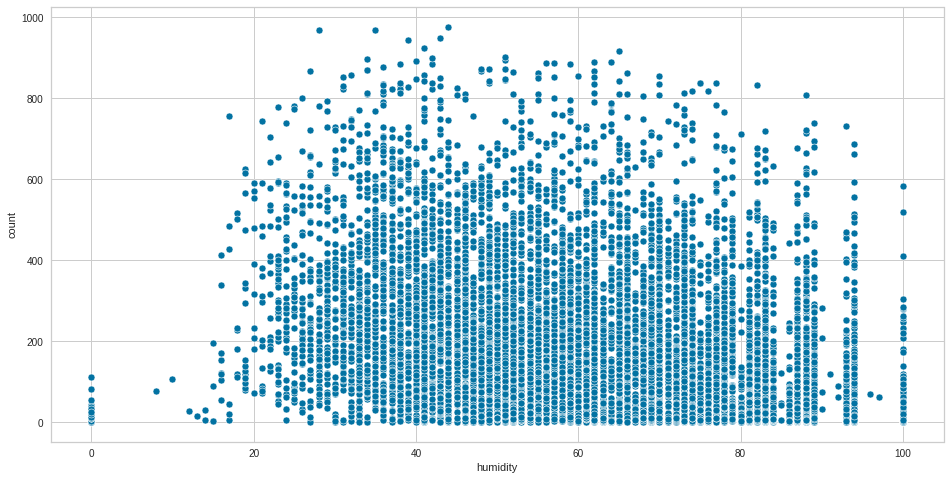

In [242]:
# humidity
plt.figure(figsize = (16,8))
sns.scatterplot(data = data, x = 'humidity', y = 'count')

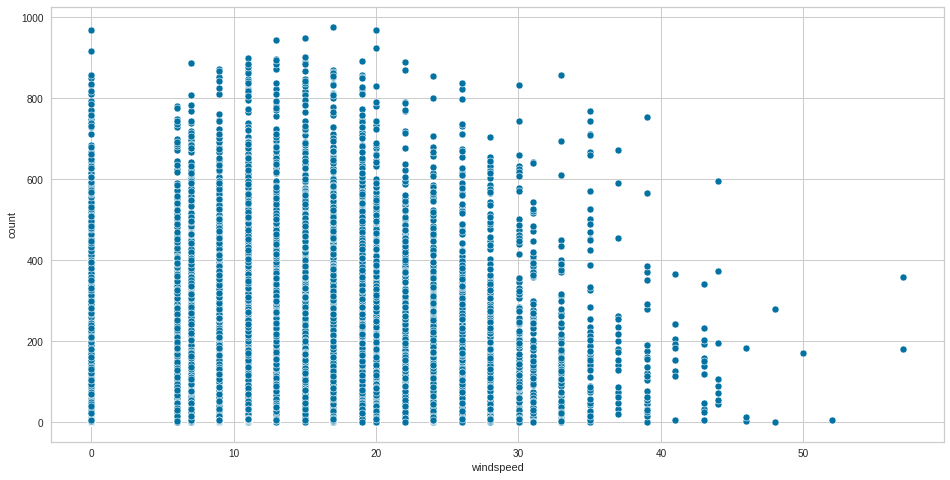

In [243]:
# windspeed
plt.figure(figsize = (16,8))
sns.scatterplot(data =data, x = 'windspeed', y = 'count')

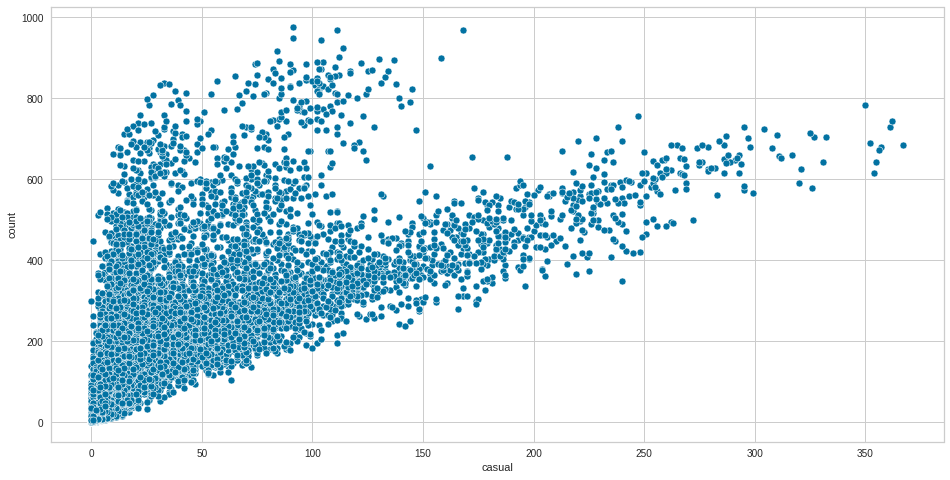

In [244]:
# casual
plt.figure(figsize = (16,8))
sns.scatterplot(data = data, x = 'casual', y= 'count')

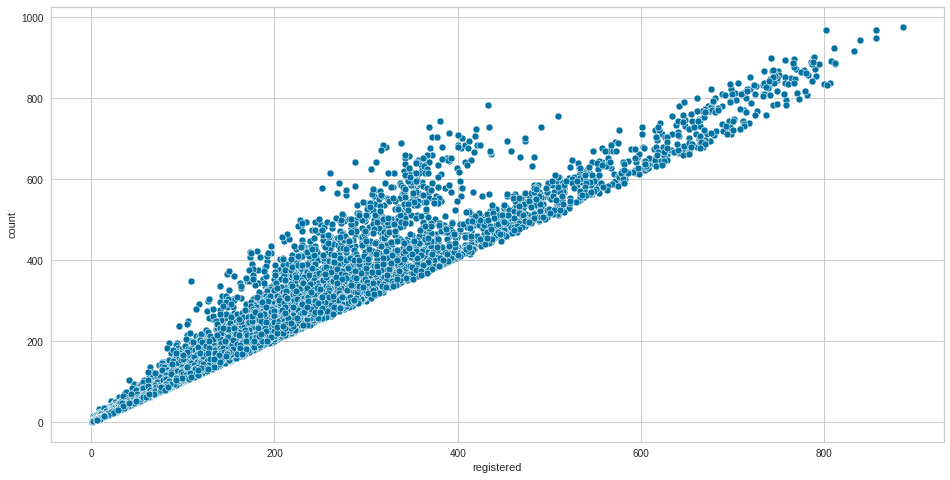

In [245]:
# registered
plt.figure(figsize = (16,8))
sns.scatterplot(data =data, x = 'registered', y = 'count')

# 다시 모델링 하기

In [246]:
# casual과 registered변수를 제거해준다.
data = data.drop(['casual', 'registered'], axis = 1)

# 더미화 해줄 변수 선택해 주기
dummies = ['weather', 'season','month','hour']
data = pd.get_dummies(data = data, columns = dummies)

# 모델변수 만들어 주기
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,day,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,0.316687,81,0.0,16,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,0.299967,80,0.0,40,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,0.299967,80,0.0,32,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,0.316687,75,0.0,13,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,0.316687,75,0.0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [247]:
# 다시 모델을 돌려주기 위해서 train_test_split을 이용해서 데이터를 나눠준다.
X_train, X_test, y_train, y_test = train_test_split(data.drop('count', axis = 1), data['count'], test_size = 0.2, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred)**0.5

# rmse가 엄청 낮아지는걸 확인할 수 있다.
print(RMSE)

110.58194320590705


In [248]:
# 처음 모델을 돌렸을 때 보다 R_squared나 Adj. R-squared의 점수가 많이 올랐고 과적합에 대한 문제도 없어졌다
X = X_train
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     348.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        06:42:10   Log-Likelihood:                -53192.
No. Observations:                8708   AIC:                         1.065e+05
Df Residuals:                    8663   BIC:                         1.068e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       -3.1205      7.307     -0.427      0.6

# Credit Card Fraud Detection

In [249]:
# 모듈과 데이터 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/kaggle/creditcard.csv')
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# [하] 데이터의 분포를 확인하고 결론을 도출하시오.

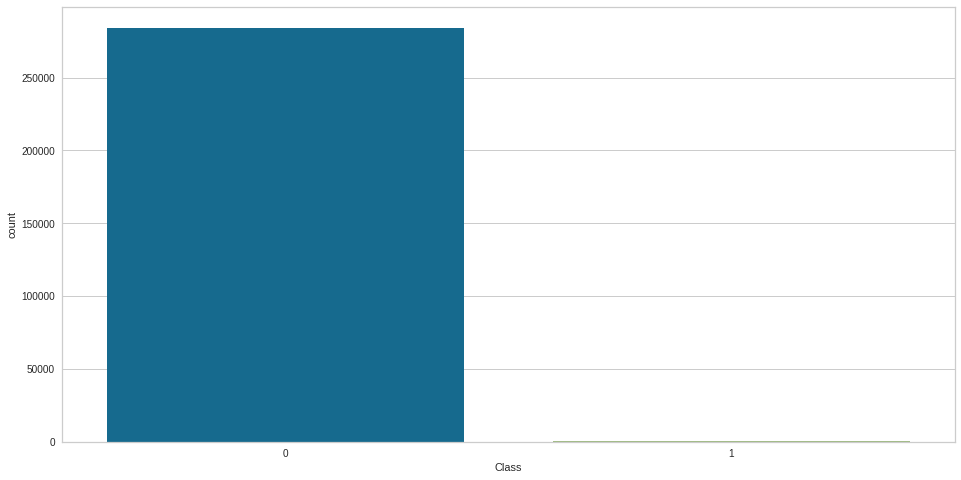

In [250]:
# 각 분포를 distplot으로 하나씩 확인해 보자.
plt.figure(figsize = (16,8))
sns.countplot(data['Class'])

# Class라는 변수는 1과 0의 차이가 심하게 난다.
# f_score가 좋지 않을 것이라고 판단하고 oversampling을 통해서 데이터를 맞춰주어야 한다.

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# [중] 현재 데이터에 필요한 방법을 논의하고 코드를 검증을 하시오.

In [252]:
# 우리는 오버샘플링을 하여서 target변수의 비율을 맞춰주도록 하자.
from imblearn.over_sampling import SMOTE

# 모델 설정
sm = SMOTE(ratio = 'auto', kind = 'regular')
X_resampled, y_resampled = sm.fit_sample(data.drop('Class', axis = 1), data['Class'])

print(X_resampled.shape, y_resampled.shape)

X_resampled = pd.DataFrame(X_resampled, columns = data.drop('Class', axis =1).columns)
y_resampled = pd.DataFrame(y_resampled, columns =['target'])

(568630, 30) (568630,)


In [253]:
data = pd.concat([X_resampled,y_resampled], axis = 1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


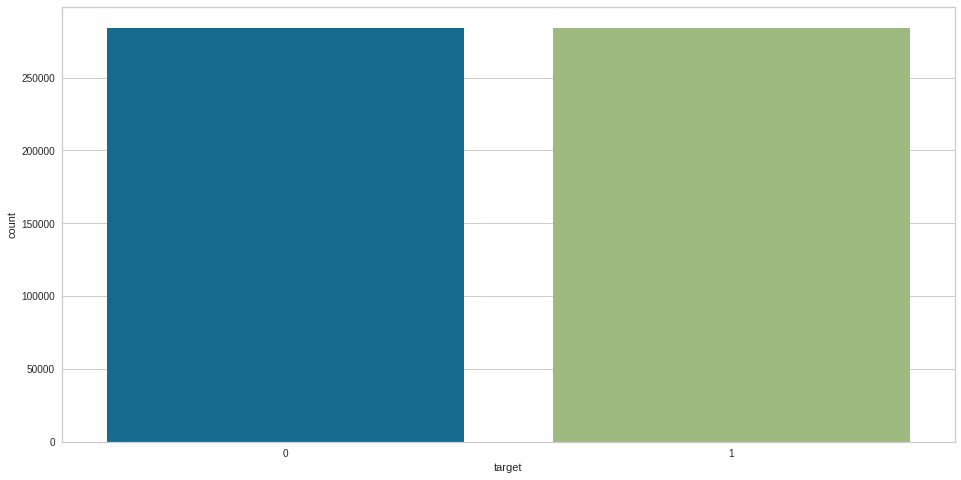

In [254]:
# 분포를 확인해 보자.
plt.figure(figsize = (16,8))
sns.countplot(data['target'])

# modeling

# [상] 위의 문제에서 제시한 방법을 적용한 다음에 모델로 검증을 하시오.


In [255]:
# 데이터를 제거해 준다.
data = data.drop('Time', axis = 1)

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

np.mean(y_pred == y_test)
# acc는 0.98이 나오게 되었다.

0.9786504405325079

# [상] 모델로 나온 결과를 해석하고 결론을 도출하시오.


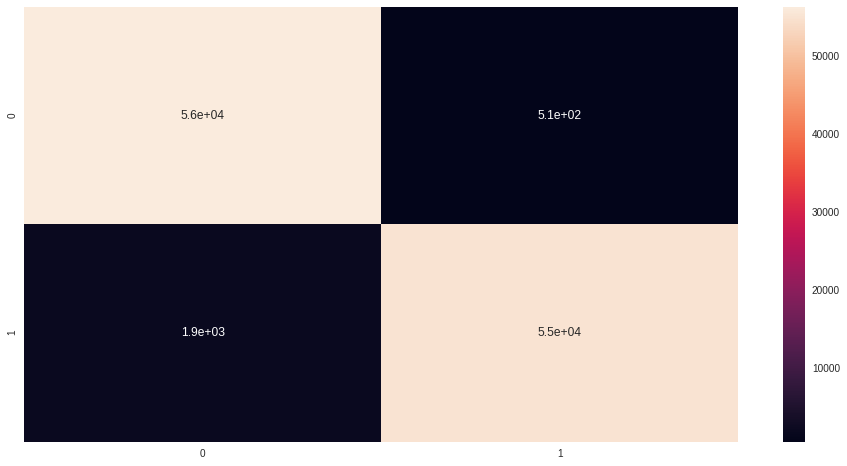

In [258]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(mat, annot = True)

0.9786504405325079

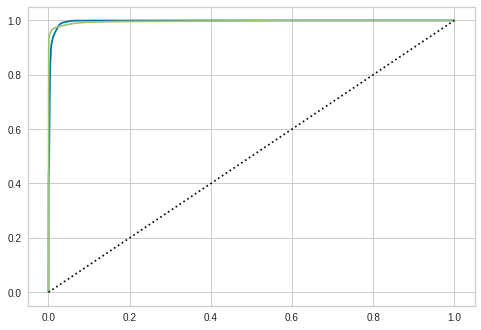

In [259]:
# 모델이 성공적으로 맞았다는 걸로 볼 수 있다.
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model, micro=False, macro = False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# [상] 기존 모델에서 최적화를 하여 더 좋은 결과를 얻어내는 과정을 서술하시오.(코드로)

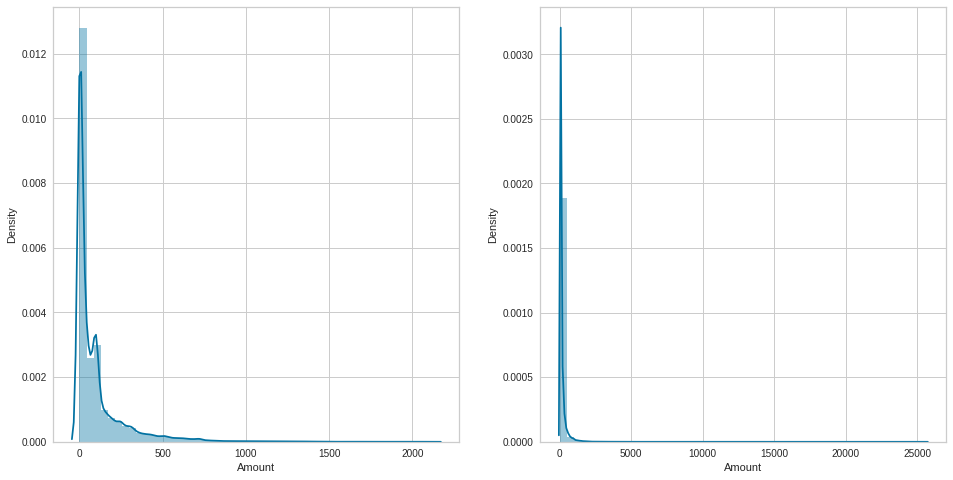

In [260]:
# Amount는 한쪽에 치우쳐져있기 때문에 log를 씌워서 평균을 가운데로 모아주어야 겠다.
fig, ax = plt.subplots(ncols = 2,figsize = (16,8))
sns.distplot(data[data['target'] == 1.0]['Amount'], ax = ax[0])
sns.distplot(data[data['target'] == 0.0]['Amount'], ax = ax[1])

Text(0.5, 1.0, 'Amount distribution')

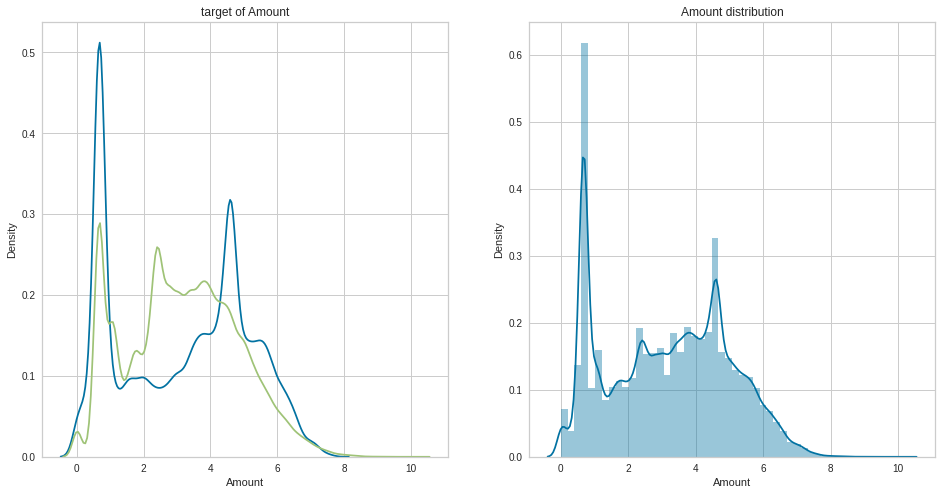

In [261]:
# log를 씌워주기
data['Amount'] = data['Amount'].apply(lambda x: np.log1p(x))

# 그래프 그려보기
fig, ax = plt.subplots(ncols = 2,figsize = (16,8))
sns.distplot(data[data['target'] == 1.0]['Amount'], ax = ax[0], hist = False)
sns.distplot(data[data['target'] == 0.0]['Amount'], ax = ax[0], hist = False)

sns.distplot(data['Amount'], ax = ax[1])
ax[0].set_title('target of Amount')
ax[1].set_title('Amount distribution')

# 평균을 중앙으로 모이게 했다.

In [262]:
# 똑같은 모델을 써서 검증해보자.
# 위에 있는 모델보다 더 좋은 결과가 있었다.
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

np.mean(y_pred == y_test)

0.9804090533387264

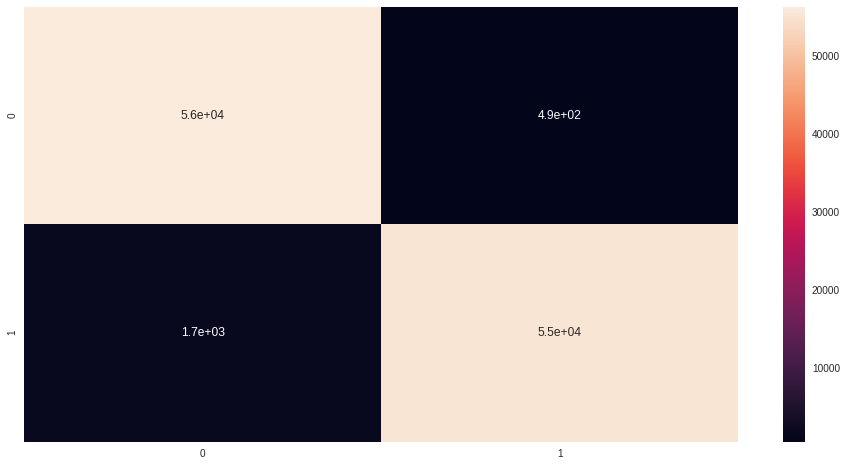

In [263]:
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(mat, annot = True)

# 빅데이터 환경 분석

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/kaggle/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Dimensionality Reduction 방법을 사용하여서 결론을 도출하시오

In [265]:
data = data.drop('Time', axis = 1)

In [266]:
# PCA방법을 통해서 데이터를 축소해 보자!
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
# pca
pca = PCA(n_components = 20)
X = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V2', 'Amount']]
y = data['Class']

# TSNA
# X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.values)

# TruncatedSVd
# X_reduced_trunc = TruncatedSVD(n_components = 2, random_state = 42).fit_transform(X.values)

data_x = pca.fit_transform(X)

data_x = pd.DataFrame(data_x)
data = pd.concat([data_x, y], axis = 1)

# 딥러닝 모델을 사용하여서 검증하시오.

In [267]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Class
0,61.271261,0.594432,1.254171,-2.657534,1.172928,-0.229898,0.153221,-0.161394,0.388742,-0.075812,-0.551587,0.593519,1.006360,0.269713,-0.116926,1.477527,-0.466078,-0.204661,-0.020832,-0.439790,0
1,-85.662233,-0.463919,-0.951333,-0.188732,0.448164,0.057109,-0.005076,-0.058632,-0.308727,-0.025590,1.612629,-1.058904,-0.510432,0.140050,0.029911,0.633014,0.462900,0.111977,0.186582,0.146463,0
2,290.319612,-0.093025,1.055759,-2.131355,0.099294,-1.304302,0.516482,-0.445006,-1.073027,1.030583,0.624309,-0.070317,-0.707496,0.211132,-0.058059,2.361919,-2.874862,-1.088861,0.251815,2.165037,0
3,35.152092,0.223974,1.007153,-1.741538,-0.968835,-1.146896,0.337913,-0.415594,-1.207358,0.646919,-0.226606,-0.178879,-0.504921,0.282232,-0.223581,-0.615595,-1.049739,0.722629,-1.904718,1.317861,0
4,-18.363251,1.522182,0.648060,-1.683585,0.237998,0.002107,-0.262479,0.112543,1.159469,0.328095,-0.822820,-0.514612,-1.352364,1.016496,-0.465302,0.197999,-0.447305,0.238622,0.041839,-0.858738,0


In [268]:
# 우리는 오버샘플링을 하여서 target변수의 비율을 맞춰주도록 하자.
from imblearn.over_sampling import SMOTE

# 모델 설정
sm = SMOTE(ratio = 'auto', kind = 'regular')
X_resampled, y_resampled = sm.fit_sample(data.drop('Class', axis = 1), data['Class'])

print(X_resampled.shape, y_resampled.shape)

X_resampled = pd.DataFrame(X_resampled, columns = data.drop('Class', axis =1).columns)
y_resampled = pd.DataFrame(y_resampled, columns =['target'])

(568630, 20) (568630,)


In [269]:
data = pd.concat([X_resampled, y_resampled], axis = 1)

In [270]:
# 딥러닝 패키지 불러오기
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# train과 test로 나눠주기
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42)

X_train = X_train.values
X_test = X_test.values
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (20,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.fit(X_train, y_train, epochs = 100, batch_size = 512, validation_data = (X_test,y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               10752     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [271]:
model.evaluate(X_test,y_test)
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

3554/3554 [==============================] - 6s 2ms/step - loss: 0.0139 - acc: 0.9941


# Confusion matrix 혹은 classification_report를 출력하고 결과를 도출하시오.

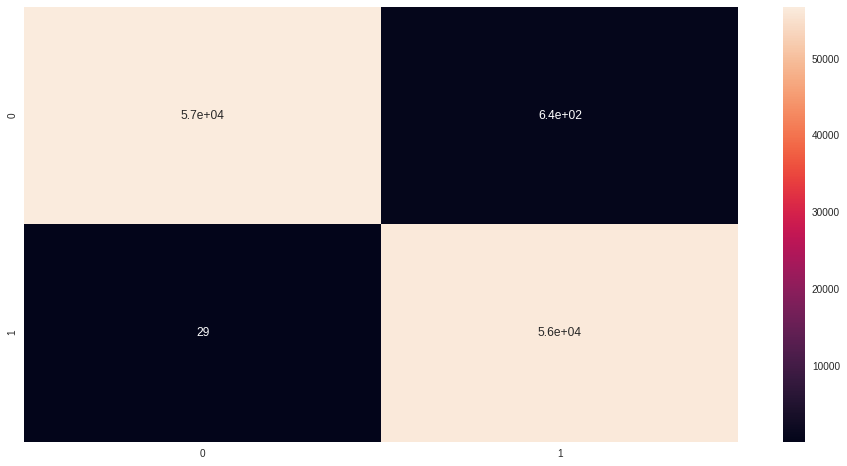

In [272]:
# imbalance 데이터이기 때문에 acc보다는 f_score를 통해서 모델이 잘 만들어졌는지 검증이 필요하다.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred ,y_test)
plt.figure(figsize = (16,8))
sns.heatmap(mat, annot = True)

# ROC/AUC curve를 그리고 결과를 해석하시오.


No handles with labels found to put in legend.


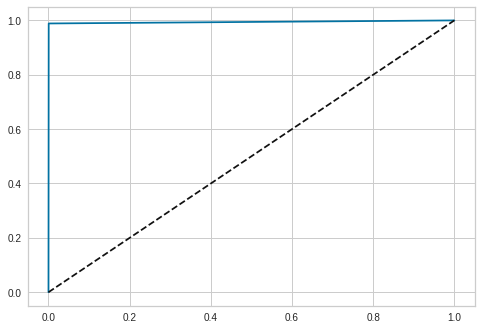

In [273]:
from sklearn.metrics import roc_curve
# 모델이 아주 잘 맞는 것을 볼 수 있다.
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()

# Hyper Parameter를 Bayesian Optimization을 사용해보시오.

In [274]:
!pip install bayesian-optimization

In [278]:
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42, stratify = data['target'])

In [279]:
params = {
    'learning_rate':(0.001,0.005),
    'max_depth':(12,14,16,18)
}

In [280]:
def lgb_evaluate(numLeaves, maxDepth, scaleWeight, minChildWeight, subsample, colSam):
    clf = LGBMClassifier(
        objective = 'binary',
        metric= 'auc',
        reg_alpha= 0,
        reg_lambda= 2,
#       bagging_fraction= 0.999,
        min_split_gain= 0,
        min_child_samples= 10,
        subsample_freq= 3,
#       subsample_for_bin= 50000,
#       n_estimators= 9999999,
        n_estimators= 99,
        num_leaves= int(numLeaves),
        max_depth= int(maxDepth),
        scale_pos_weight= scaleWeight,
        min_child_weight= minChildWeight,
        subsample= subsample,
        colsample_bytree= colSam,
        verbose =-1)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)
def bayesOpt(X_train, y_train):
    lgbBO = BayesianOptimization(lgb_evaluate, {                                               
                                                'numLeaves':  (5, 90),
                                                'maxDepth': (2, 90),
                                                'scaleWeight': (1, 10000),
                                                'minChildWeight': (0.01, 70),
                                                'subsample': (0.4, 1),                                               
                                                'colSam': (0.4, 1)
                                            })
    lgbBO.maximize(init_points=5, n_iter=10)
    print(lgbBO.res)

In [281]:
bayesOpt(X_train, y_train)

|   iter    |  target   |  colSam   | maxDepth  | minChi... | numLeaves | scaleW... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9978   |  0.4947   |  3.741    |  49.31    |  87.51    |  8.912e+0 |  0.8191   |
|  2        |  0.9999   |  0.7632   |  85.84    |  6.457    |  70.32    |  986.3    |  0.5783   |
|  3        |  0.9989   |  0.9575   |  4.201    |  26.47    |  63.51    |  8.601e+0 |  0.5363   |
|  4        |  0.9998   |  0.817    |  36.31    |  4.113    |  32.52    |  596.3    |  0.7338   |
|  5        |  0.9998   |  0.6373   |  63.67    |  50.71    |  42.26    |  3.627e+0 |  0.658    |
|  6        |  0.9981   |  0.6822   |  79.48    |  66.88    |  5.832    |  68.03    |  0.8344   |
|  7        |  0.9996   |  0.6002   |  5.373    |  2.678    |  87.9     |  4.627e+0 |  0.4547   |
|  8        |  0.9972   |  0.9933   |  88.74    |  0.01782  |  5.995    |  6.476e+0 |  0.4059   |
|  9        |  0.996